In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_A = pd.read_csv('[Daytime]A.csv')
data_B = pd.read_csv('[Daytime]B.csv')
data_A.drop(columns=['Unnamed: 0'],inplace=True)
data_B.drop(columns=['Unnamed: 0'],inplace=True)
data_A['date'] = pd.to_datetime(data_A['date'])
data_B['date'] = pd.to_datetime(data_B['date'])


In [19]:
def permutation_test(treatment, control):
    treatment = np.array(treatment)
    control = np.array(control)
    observed_diff = (np.mean(treatment) - np.mean(control))
    
    combined = np.concatenate([treatment, control])
    perm_diff = []
    for i in range (10000):
        np.random.shuffle(combined)
        new_treatment = combined[:len(treatment)]
        new_control = combined[len(treatment):]
        perm_diff.append(np.mean(new_treatment)-np.mean(new_control))
    p_val = np.mean((np.abs(perm_diff)>np.abs(observed_diff)))
    if (p_val>0.05):
        print(f"p value = {p_val}. There is no significant difference in ")
    else: 
        print(f'p value = {p_val}. There is a significant difference in ')
    return perm_diff, observed_diff


p value = 0.1391. There is no significant difference in 
p value = 0.0. There is a significant difference in 
p value = 0.0001. There is a significant difference in 
p value = 0.0. There is a significant difference in 
p value = 0.0094. There is a significant difference in 
p value = 0.8348. There is no significant difference in 
p value = 0.7685. There is no significant difference in 
p value = 0.7628. There is no significant difference in 
p value = 0.8732. There is no significant difference in 
p value = 0.6859. There is no significant difference in 
p value = 0.5576. There is no significant difference in 
p value = 0.5676. There is no significant difference in 
p value = 0.0. There is a significant difference in 
p value = 0.7528. There is no significant difference in 


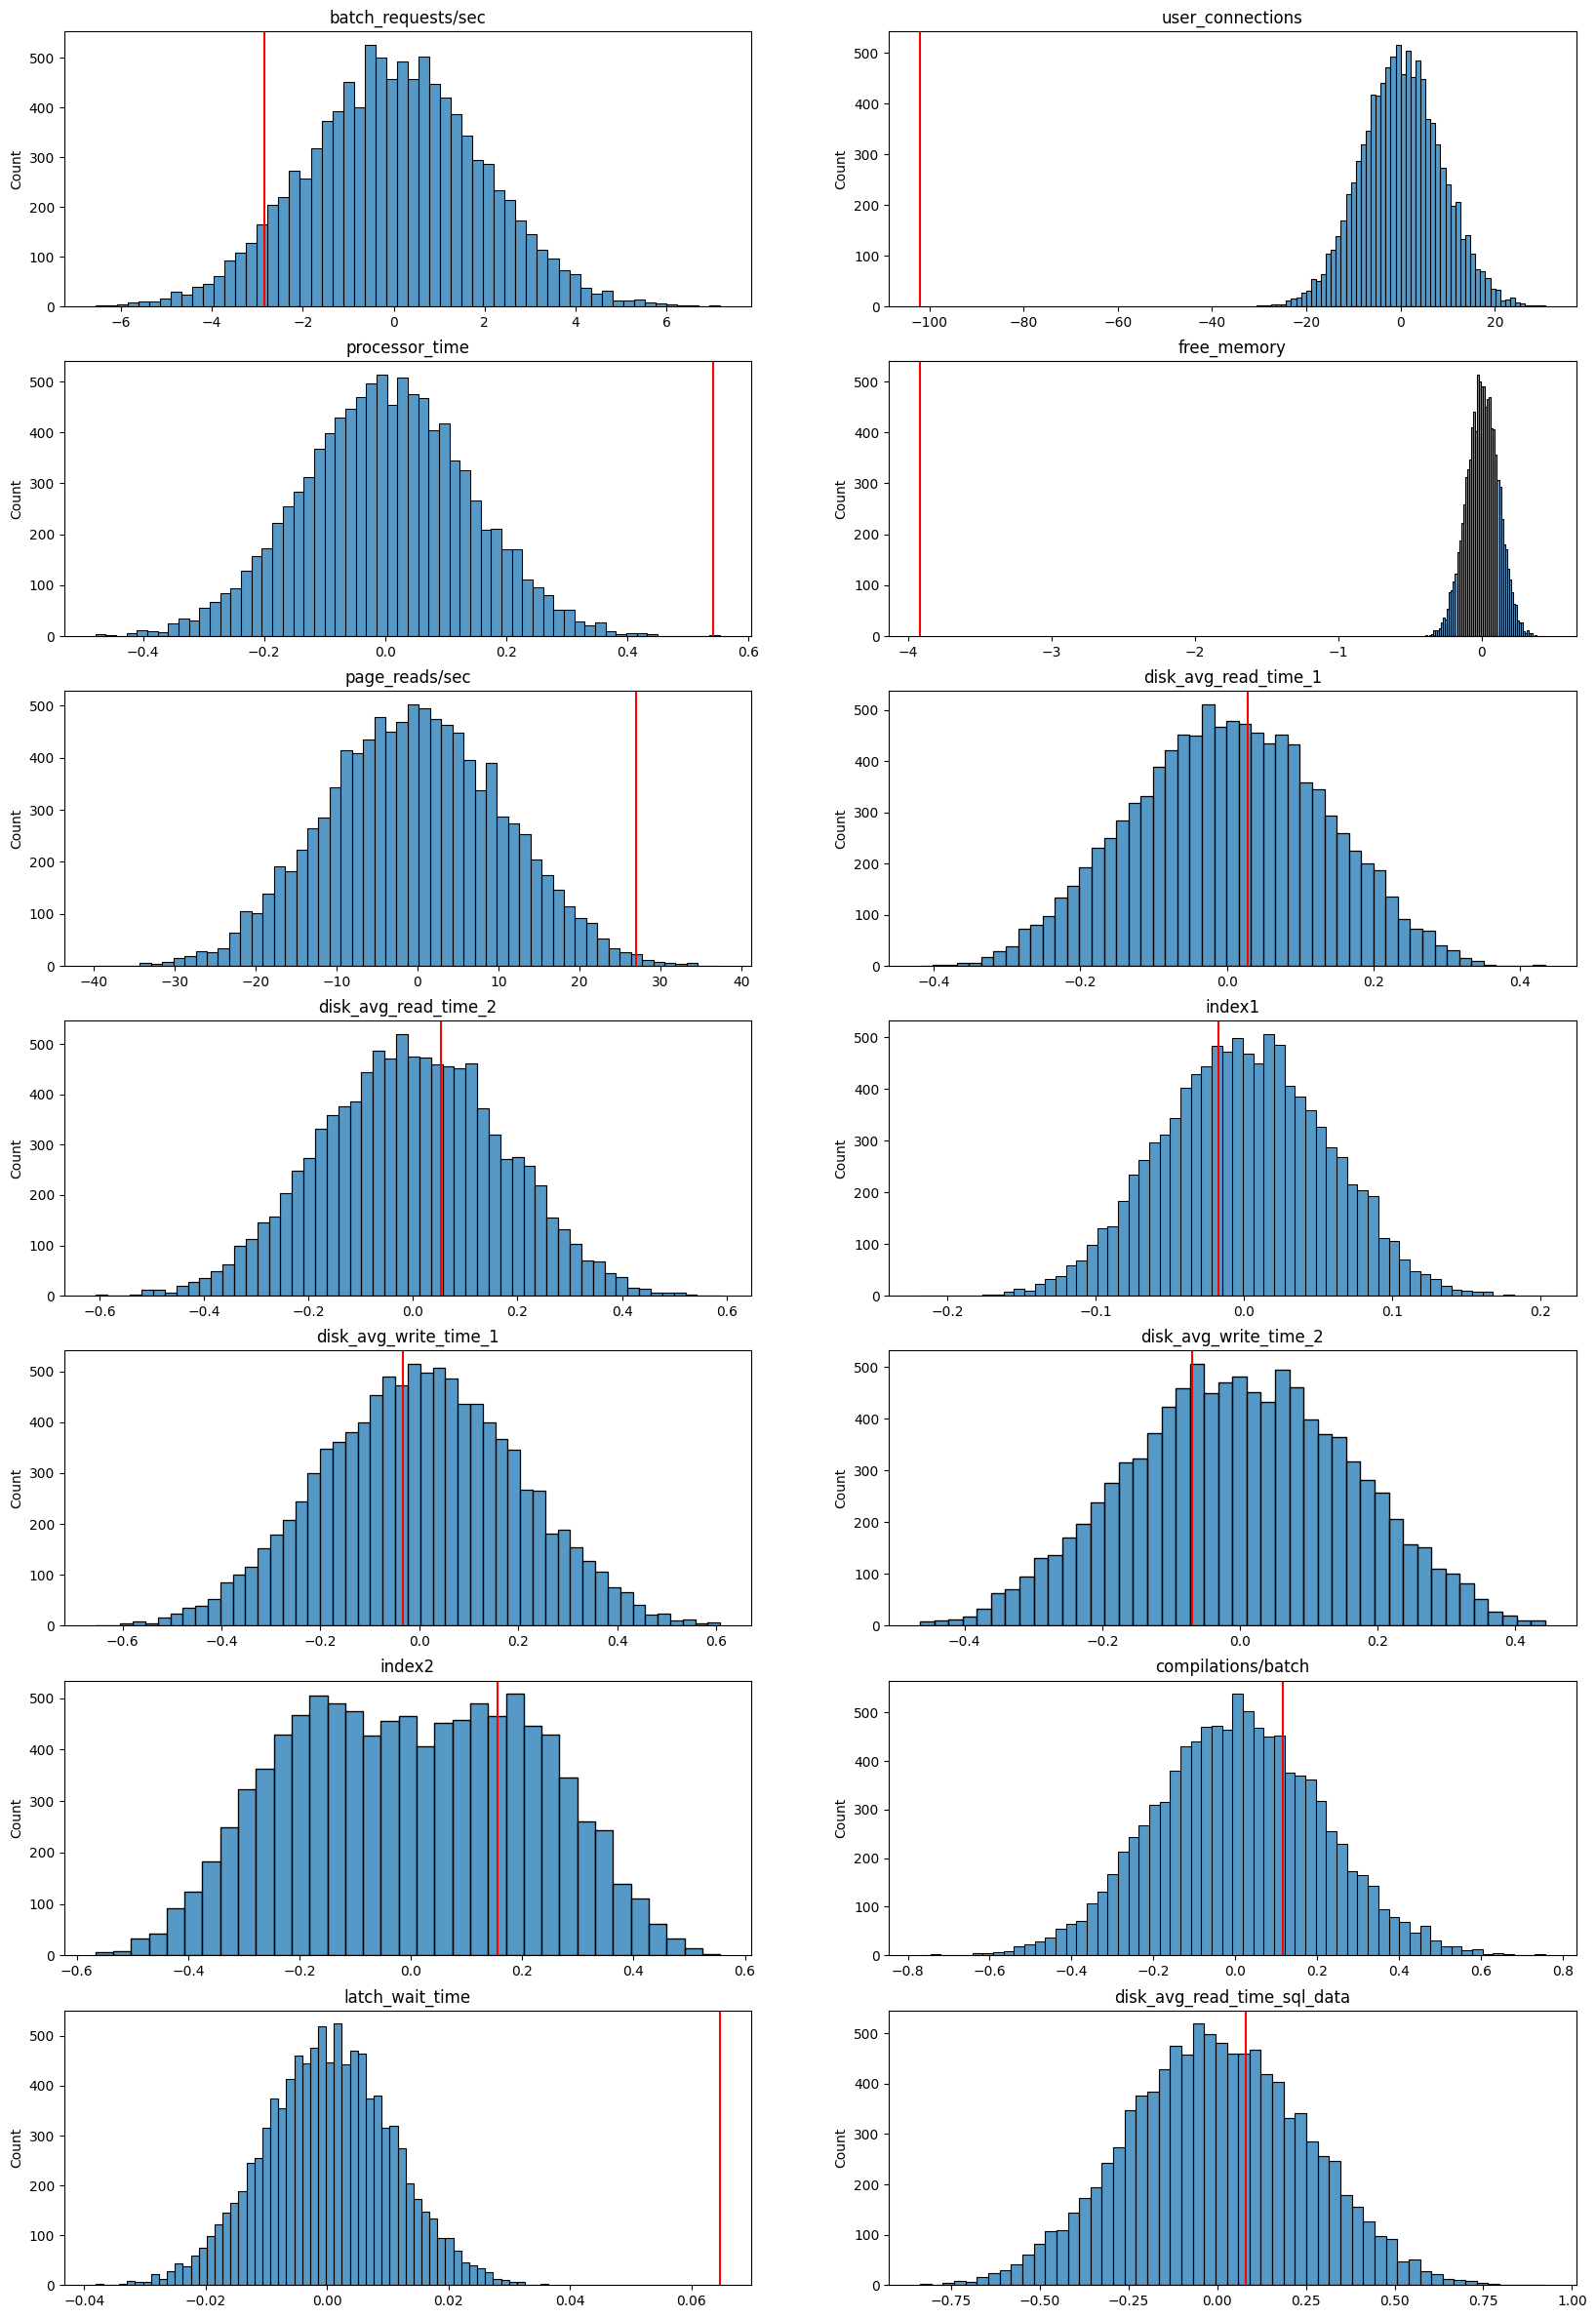

In [28]:
fig, axes = plt.subplots(nrows= 7, ncols=2, figsize= (20, 30))
axes = axes.flatten()

for i in range (1, len(data_A.columns)):
    perm_list, observed = permutation_test(data_A[data_A.columns[i]].dropna(), data_B[data_A.columns[i]].dropna())
    sns.histplot(data = perm_list, ax = axes[i-1])
    axes[i-1].axvline(x = observed, color = 'r')
    axes[i-1].set_title(data_A.columns[i])